In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

files = ["MSFT_clean.csv", "AAPL_clean.csv", "SPY_clean.csv"]
dfs = {
    name.replace(".csv", ""): pd.read_csv(
        f"../data/processed/{name}", index_col=0, parse_dates=True
    )
    for name in files
}

for name, df in dfs.items():
    print(f"\n{name} dataset shape: {df.shape}")
    print(df.head())


MSFT_clean dataset shape: (501, 6)
              open     high       low   close      volume symbol
2023-08-21  317.93  322.770  317.0400  321.88  24039956.0   MSFT
2023-08-22  325.50  326.075  321.4600  322.46  16102024.0   MSFT
2023-08-23  323.82  329.200  323.4600  327.00  21166382.0   MSFT
2023-08-24  332.85  332.980  319.9600  319.97  23281434.0   MSFT
2023-08-25  321.47  325.360  318.8001  322.98  21684104.0   MSFT

AAPL_clean dataset shape: (501, 6)
               open     high      low   close      volume symbol
2023-08-21  175.070  176.130  173.735  175.84  46311879.0   AAPL
2023-08-22  177.060  177.680  176.250  177.23  42084245.0   AAPL
2023-08-23  178.520  181.550  178.325  181.12  52722752.0   AAPL
2023-08-24  180.674  181.104  176.010  176.38  54945798.0   AAPL
2023-08-25  177.380  179.150  175.820  178.61  51449594.0   AAPL

SPY_clean dataset shape: (501, 6)
              open    high      low   close       volume symbol
2023-08-21  437.55  440.11  435.320  439.34   687

In [8]:
for name, df in dfs.items():
    print(f"\n=== Summary stats for {name} ===")
    print(df.describe())
    print("\nMissing values:")
    print(df.isna().sum())
    print("\nSkewness:")
    print(df.skew(numeric_only=True))


=== Summary stats for MSFT_clean ===
             open        high         low       close        volume
count  501.000000  501.000000  501.000000  501.000000  5.010000e+02
mean   413.305635  416.741747  409.669153  413.389451  2.177647e+07
std     46.444342   46.345701   46.263385   46.200871  8.208648e+06
min    310.990000  314.299000  309.450000  312.140000  7.164543e+06
25%    386.000000  391.740000  383.280000  388.470000  1.665309e+07
50%    415.600000  418.348000  411.550000  415.280000  1.995285e+07
75%    434.280000  438.500000  431.110300  434.560000  2.384978e+07
max    555.225000  555.450000  531.900000  535.640000  7.850232e+07

Missing values:
open      0
high      0
low       0
close     0
volume    0
symbol    0
dtype: int64

Skewness:
open      0.152551
high      0.140786
low       0.135089
close     0.112619
volume    2.469597
dtype: float64

=== Summary stats for AAPL_clean ===
             open        high         low       close        volume
count  501.000000  50

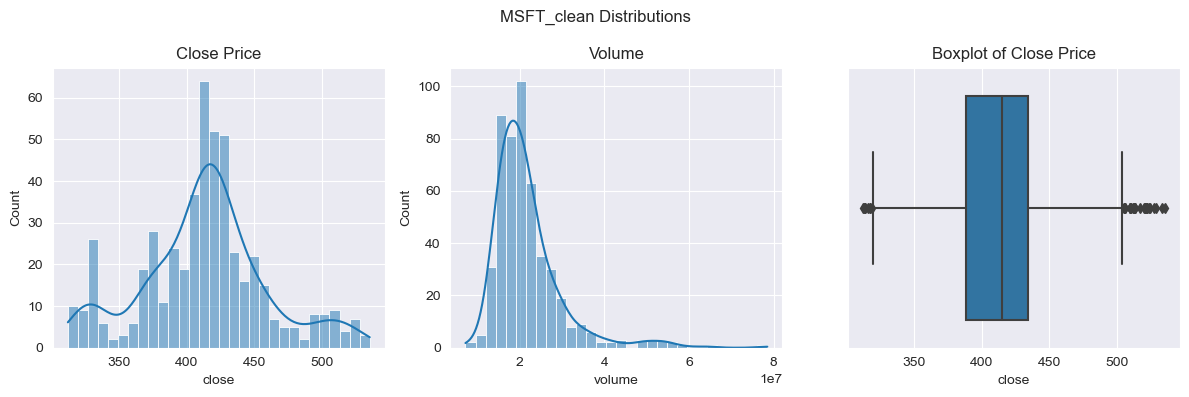

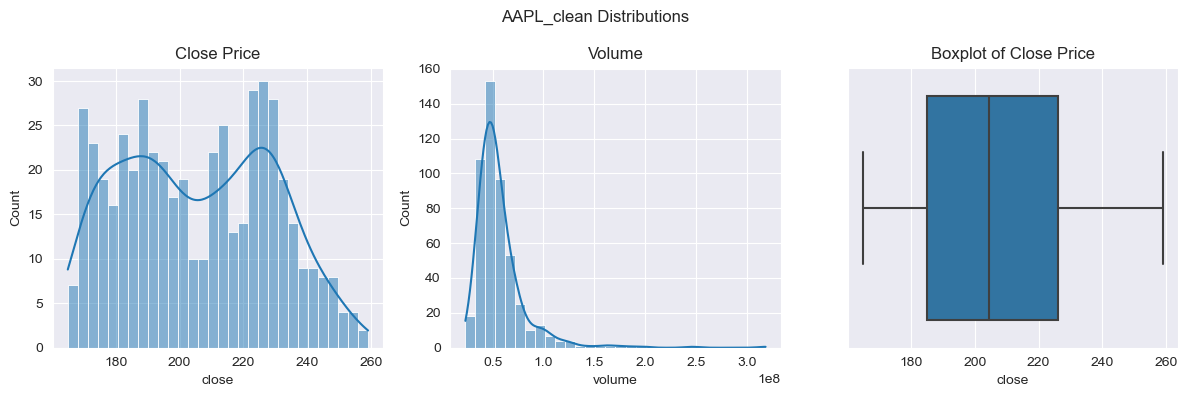

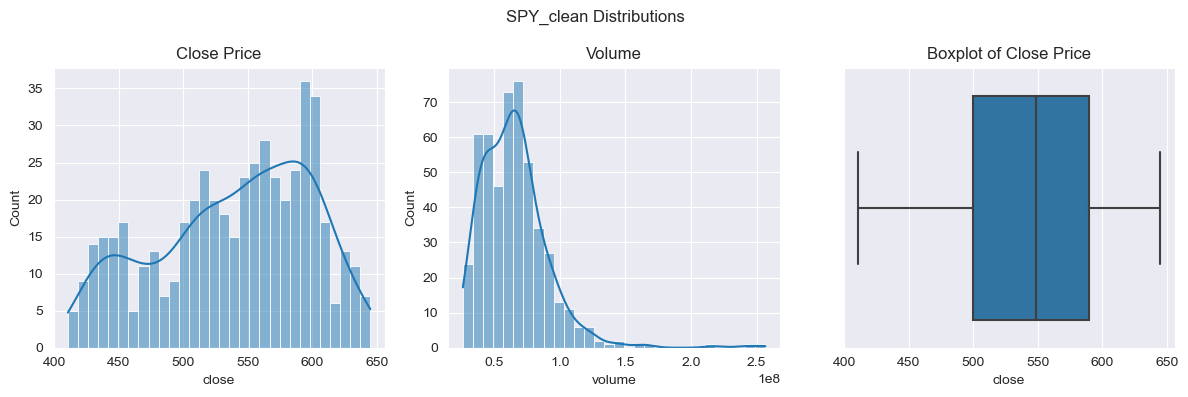

In [9]:
# Distributions
for name, df in dfs.items():
    plt.figure(figsize=(12,4))
    plt.suptitle(f"{name} Distributions")
    
    plt.subplot(1,3,1)
    sns.histplot(df["close"], bins=30, kde=True)
    plt.title("Close Price")
    
    plt.subplot(1,3,2)
    sns.histplot(df["volume"], bins=30, kde=True)
    plt.title("Volume")
    
    plt.subplot(1,3,3)
    sns.boxplot(x=df["close"])
    plt.title("Boxplot of Close Price")
    
    plt.tight_layout()
    plt.show()